In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

We start by reading in the raw data with pandas.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv', sep=';')

In [3]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


We see that we are have a table containing data for Ruter-buslines in Oslo and Viken, with timeframes for expected arrival and departure vs scheduled arrival and departue for Holdeplass_Fra-stops, the number of passengers aboard, the area the bus line travels etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

We see from the info-print that we need to parse some of the table columns from objects to correct types. 

In [5]:
df['Dato'] = pd.to_datetime(df['Dato'])

df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   TurId                                      6000 non-null   object        
 1   Dato                                       6000 non-null   datetime64[ns]
 2   Fylke                                      6000 non-null   object        
 3   Område                                     6000 non-null   object        
 4   Kommune                                    6000 non-null   object        
 5   Holdeplass_Fra                             6000 non-null   object        
 6   Holdeplass_Til                             6000 non-null   object        
 7   Linjetype                                  6000 non-null   object        
 8   Linjefylke                                 6000 non-null   object        
 9   Linjenavn          

We see from the table that we have multiple entries containing nan-values and choose to drop the corresponding table rows. 

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5774 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   TurId                                      5774 non-null   object        
 1   Dato                                       5774 non-null   datetime64[ns]
 2   Fylke                                      5774 non-null   object        
 3   Område                                     5774 non-null   object        
 4   Kommune                                    5774 non-null   object        
 5   Holdeplass_Fra                             5774 non-null   object        
 6   Holdeplass_Til                             5774 non-null   object        
 7   Linjetype                                  5774 non-null   object        
 8   Linjefylke                                 5774 non-null   object        
 9   Linjenavn          

In [9]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2021-09-26 10:53:53,2021-09-26 10:53:59,2021-09-26 10:53:00,2021-09-26 10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2021-09-26 13:12:20,2021-09-26 13:12:26,2021-09-26 13:12:00,2021-09-26 13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2021-09-26 10:18:56,2021-09-26 10:19:21,2021-09-26 10:19:00,2021-09-26 10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2021-09-26 13:52:04,2021-09-26 13:52:26,2021-09-26 13:51:00,2021-09-26 13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2021-09-26 07:34:13,2021-09-26 07:34:53,2021-09-26 07:33:00,2021-09-26 07:33:00,112,10


We have encountered a problem. Since we simply converted the timeframes to datetime "as is" pandas added a date-element to the time-columns containing today's date. We don't want this, and instead parse the time-objects with the date-objects from the date column in order to get the correct datetime objects.

In [10]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Dato'].dt.date.astype(str) +' '+df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].dt.time.astype(str))
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Dato'].dt.date.astype(str) +' '+df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'].dt.time.astype(str))
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Dato'].dt.date.astype(str) +' '+df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'].dt.time.astype(str))
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Dato'].dt.date.astype(str) +' '+df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].dt.time.astype(str))

In [11]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2020-10-08 10:53:53,2020-10-08 10:53:59,2020-10-08 10:53:00,2020-10-08 10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2020-08-15 13:12:20,2020-08-15 13:12:26,2020-08-15 13:12:00,2020-08-15 13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2020-03-08 10:18:56,2020-03-08 10:19:21,2020-03-08 10:19:00,2020-03-08 10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2020-07-27 13:52:04,2020-07-27 13:52:26,2020-07-27 13:51:00,2020-07-27 13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2020-08-27 07:34:13,2020-08-27 07:34:53,2020-08-27 07:33:00,2020-08-27 07:33:00,112,10


We now seemingly have the correct dates for the time-columns of the table. But if the bus stops around midnight, the date in the datetime objects will be wrong. We add the correct day by iterating through the table-rows and adding one day if we pass midnight.

In [12]:
for index, row in df.iterrows():
    if(row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] < row['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']):
        df.loc[index, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = row['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] + datetime.timedelta(days=1)

    if(row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] < row['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']):
        df.loc[index, 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = row['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] + datetime.timedelta(days=1)

In [13]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,2020-10-08 10:53:53,2020-10-08 10:53:59,2020-10-08 10:53:00,2020-10-08 10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,2020-08-15 13:12:20,2020-08-15 13:12:26,2020-08-15 13:12:00,2020-08-15 13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,2020-03-08 10:18:56,2020-03-08 10:19:21,2020-03-08 10:19:00,2020-03-08 10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,2020-07-27 13:52:04,2020-07-27 13:52:26,2020-07-27 13:51:00,2020-07-27 13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,2020-08-27 07:34:13,2020-08-27 07:34:53,2020-08-27 07:33:00,2020-08-27 07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,2020-10-06 16:23:18,2020-10-06 16:23:48,2020-10-06 16:10:00,2020-10-06 16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,2020-06-23 06:00:32,2020-06-23 06:00:40,2020-06-23 05:59:00,2020-06-23 05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,2020-11-06 17:42:43,2020-11-06 17:43:10,2020-11-06 17:32:00,2020-11-06 17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,2020-08-13 06:00:11,2020-08-13 06:00:23,2020-08-13 05:59:00,2020-08-13 05:59:00,151,5


Our table contains table entries with a negative number of passengers boarded on the buses. There are multiple alternatives for correcting this, each with different advantages and disadvantages. One alternative is to replace the number of passengers with the mean value of the number of passengers aboard all the buses. Another to replace all negative passenger numbers with zero, and a third to drop the corresponding table rows entirely. The choice depends on what would be the most likely reason for the wrong passenger data. We believe that the negative values stems from passengers changing their minds about a planned trip or sensors failing to register passenger boardings etc, making it more likely that the total number of passengers actually aboard the buses are closer to 0. We therefore change all negative values for boarded passengers to 0.

In [14]:
for index, row in df.iterrows():
    if(row['Passasjerer_Ombord'] < 0):
        df.loc[index,'Passasjerer_Ombord'] = 0

Now that our data appears to be extracted correctly from the source data, we'll identify some new features. We add the columns Forsinkelse_Ankomst, Forsinkelse_Avgang, Stoppetid_Holdeplass, Kapasitetsutnyttelse_Prosent and Ukedag and see what we can interpret from this.

In [15]:
df['Forsinkelse_Ankomst'] = (df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']).dt.total_seconds()
df['Forsinkelse_Avgang'] = (df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']).dt.total_seconds()
df['Stoppetid_Holdeplass'] = (df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] - df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']).dt.total_seconds()

df['Kapasitetsutnyttelse_Prosent'] = 100*df['Passasjerer_Ombord']/df['Kjøretøy_Kapasitet']
df['Ukedag'] = df['Dato'].dt.day_name()

In [16]:
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse_Ankomst,Forsinkelse_Avgang,Stoppetid_Holdeplass,Kapasitetsutnyttelse_Prosent,Ukedag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2020-10-08 10:53:59,2020-10-08 10:53:00,2020-10-08 10:53:00,112,5,53.0,59.0,6.0,4.464286,Thursday
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2020-08-15 13:12:26,2020-08-15 13:12:00,2020-08-15 13:12:00,112,5,20.0,26.0,6.0,4.464286,Saturday
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2020-03-08 10:19:21,2020-03-08 10:19:00,2020-03-08 10:19:00,112,6,-4.0,21.0,25.0,5.357143,Sunday
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2020-07-27 13:52:26,2020-07-27 13:51:00,2020-07-27 13:51:00,112,10,64.0,86.0,22.0,8.928571,Monday
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2020-08-27 07:34:53,2020-08-27 07:33:00,2020-08-27 07:33:00,112,10,73.0,113.0,40.0,8.928571,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,2020-10-06,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,...,2020-10-06 16:23:48,2020-10-06 16:10:00,2020-10-06 16:10:00,151,2,798.0,828.0,30.0,1.324503,Tuesday
5996,10010-2020-06-23T05:54:00+02:00,2020-06-23,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,...,2020-06-23 06:00:40,2020-06-23 05:59:00,2020-06-23 05:59:00,151,2,92.0,100.0,8.0,1.324503,Tuesday
5997,2007-2020-06-11T17:22:00+02:00,2020-11-06,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,...,2020-11-06 17:43:10,2020-11-06 17:32:00,2020-11-06 17:32:00,106,3,643.0,670.0,27.0,2.830189,Friday
5998,10004-2020-08-13T04:59:00+02:00,2020-08-13,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,...,2020-08-13 06:00:23,2020-08-13 05:59:00,2020-08-13 05:59:00,151,5,71.0,83.0,12.0,3.311258,Thursday


In [17]:
df["Område"].value_counts()

Nordøst     3671
Vest        1260
Indre By     548
Sør          295
Name: Område, dtype: int64

Perhaps we want to know the average stop time for each area? (Working from the hypothesis that buses make longer stops in central areas due to more people entering and exiting the bus.)

In [18]:
df['Stoppetid_Holdeplass'].describe()

count    5774.000000
mean       30.046069
std        88.437010
min         0.000000
25%         4.000000
50%         8.000000
75%        28.000000
max      1240.000000
Name: Stoppetid_Holdeplass, dtype: float64

As we can see, we have some outliers. We'll remove them before calculating the mean values.

In [19]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    if is_numeric_dtype(df):
        df = df[(df > quant_df.loc[low]) & (df < quant_df.loc[high])]
    return df

In [20]:
df["Stoppetid_Holdeplass"] = remove_outlier(df["Stoppetid_Holdeplass"])
mean_Stoppetid = df.groupby('Område')['Stoppetid_Holdeplass'].mean()

<AxesSubplot:xlabel='Område'>

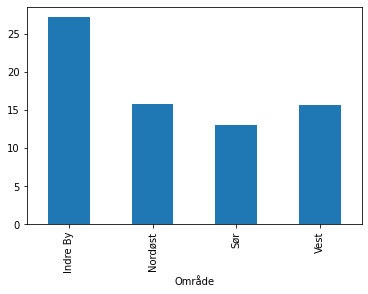

In [21]:
mean_Stoppetid.plot.bar()

As suspected, average stop time is higher in the city center. What about the capacity utilization of the bus?

In [22]:
df['Kapasitetsutnyttelse_Prosent'].describe()

count    5774.000000
mean        4.955322
std         6.165013
min         0.000000
25%         0.000000
50%         2.857143
75%         7.284768
max        80.000000
Name: Kapasitetsutnyttelse_Prosent, dtype: float64

In [23]:
index = df['Kapasitetsutnyttelse_Prosent'].argmax()
df.iloc[[index]]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse_Ankomst,Forsinkelse_Avgang,Stoppetid_Holdeplass,Kapasitetsutnyttelse_Prosent,Ukedag
3452,27004-2020-08-11T15:57:00+02:00,2020-11-08,Viken,Vest,Asker,Trollstua (mot Dikemark),Sportstuen (mot Vardåsen),Lokal,Viken,280,...,2020-11-08 16:05:08,2020-11-08 16:04:00,2020-11-08 16:04:00,80,64,40.0,68.0,28.0,80.0,Sunday


This is a plausible maximum value for the capacity utilization, which means we don't have to remove any outliers. 

<AxesSubplot:xlabel='Område'>

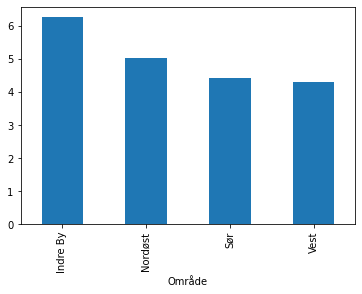

In [24]:
mean_Kapasitetsutnyttelse_Prosent = df.groupby('Område')['Kapasitetsutnyttelse_Prosent'].mean()
mean_Kapasitetsutnyttelse_Prosent.plot.bar()

On average the busses are fuller on the central lines. Curiously we don't see an increase in stop time for the northeastern lines even though they are filled at higher capacity than the southern or western lines. This might mean that more people enter and exit the buses at the same time, making subsequent stops take less time.

How about delay in departure from a bus stop as a function of delay in arrival?

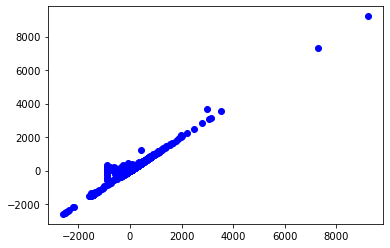

In [25]:
plt.plot(df['Forsinkelse_Ankomst'], df['Forsinkelse_Avgang'], 'bo')

We see that we have some outliers and remove them for a nicer plot.

In [26]:
df["Forsinkelse_Ankomst"] = remove_outlier(df["Forsinkelse_Ankomst"])
df["Forsinkelse_Avgang"] = remove_outlier(df["Forsinkelse_Avgang"])

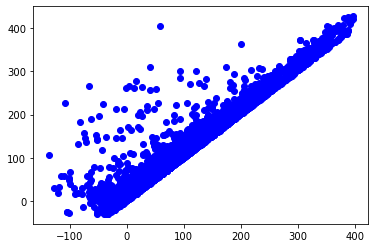

In [27]:
plt.plot(df['Forsinkelse_Ankomst'], df['Forsinkelse_Avgang'], 'bo')

In general we see a linear dependence of the delay in the departure with the delay in the arrival, but we also see some instances of increased delay.

Lastly, we can check which weekdays most people use Ruter buses.

In [28]:
df['Ukedag'].value_counts()

Friday       991
Tuesday      901
Monday       891
Thursday     875
Wednesday    866
Saturday     636
Sunday       614
Name: Ukedag, dtype: int64

As we can see from the dataset, there are more scheduled bus routes for weekdays than weekends. We would therefore also expect the number of people traveling by bus during the weekend to be less than that of the weekdays.

In [29]:
df_UkedagsCount = df.groupby('Ukedag').count()

<AxesSubplot:xlabel='Ukedag'>

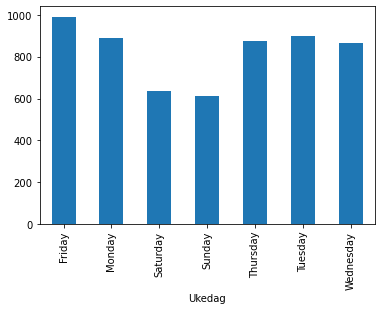

In [30]:
df_UkedagsCount["Passasjerer_Ombord"].plot.bar()

As expected, less people are recorded traveling by Ruter buses on the weekend. But what about the number of passengers on each bus on the weekend compared to the weekdays?

In [31]:
mean_passasjerer = df.groupby('Ukedag')['Passasjerer_Ombord'].mean()

<AxesSubplot:xlabel='Ukedag'>

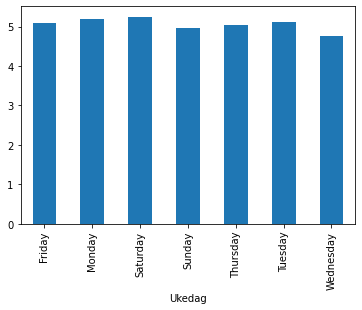

In [32]:
mean_passasjerer.plot.bar()

It would appear that the number of passengers per bus don't differ much from day to day. This would imply that the number of buses scheduled per day per hour is good.

In [33]:
Ukedager = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df["Hverdag"] = df['Ukedag'].isin(Ukedager)

In [34]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Forsinkelse_Ankomst,Forsinkelse_Avgang,Stoppetid_Holdeplass,Kapasitetsutnyttelse_Prosent,Ukedag,Hverdag
0,15006-2020-08-10T10:24:00+02:00,2020-10-08,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,2020-10-08 10:53:00,2020-10-08 10:53:00,112,5,53.0,59.0,6.0,4.464286,Thursday,True
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,2020-08-15 13:12:00,2020-08-15 13:12:00,112,5,20.0,26.0,6.0,4.464286,Saturday,False
2,15004-2020-08-03T09:54:00+02:00,2020-03-08,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,2020-03-08 10:19:00,2020-03-08 10:19:00,112,6,-4.0,21.0,25.0,5.357143,Sunday,False
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,2020-07-27 13:51:00,2020-07-27 13:51:00,112,10,64.0,86.0,22.0,8.928571,Monday,True
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,2020-08-27 07:33:00,2020-08-27 07:33:00,112,10,73.0,113.0,40.0,8.928571,Thursday,True


If we now want to see avg delay for weekdays compared to weekends we can easily find it.

<AxesSubplot:xlabel='Hverdag'>

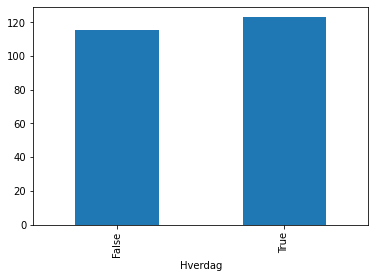

In [35]:
mean_forsinkelse_avgang = df.groupby('Hverdag')['Forsinkelse_Avgang'].mean()
mean_forsinkelse_avgang.plot.bar()

The buses are minimally less delayed at the weekends.

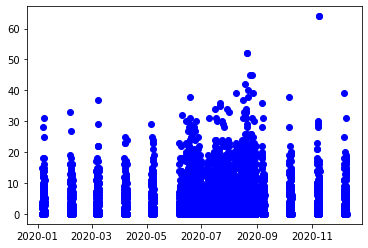

In [36]:
plt.plot(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'],df['Passasjerer_Ombord'], 'bo')

If we plot dates vs passengers we notice another feature. Our dataset contains many more routes for the months June-September. We can group the dataset by month and plot the total number of passengers per month.

<AxesSubplot:xlabel='Måned'>

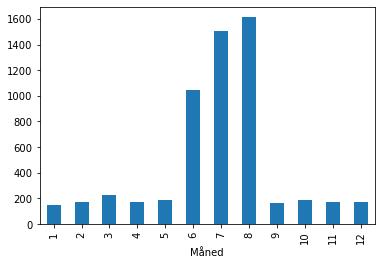

In [37]:
df['Måned'] = df['Dato'].dt.month
mean_passasjer_per_måned = df.groupby('Måned')['Passasjerer_Ombord'].count()
mean_passasjer_per_måned.plot.bar()

If this dataset contains data for all bus routes of the year, this would mean that a lot more people traveled by bus during the summer months. Not surprising, considering the pandemic. 

There are, of course, many other features to identify in this dataset. It would, for example, be interesting to note the number of passengers traveling during rush hours vs non rush hours. But we'll leave it for now. :)